# Bibliotecas

1 - Instalar a API yfinance


In [4]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2 - Importar bibliotecas

In [5]:
import pandas as pd #dataframes
import numpy as np #linear algebra
import matplotlib.pyplot as plt #data vizualization
from statsmodels.tsa.seasonal import seasonal_decompose #temporal series analyses 
import yfinance as yf #stock analysis


3 - Aquisição dos dados de ações

In [6]:
# get Ticker from tick name in API, if you don't know the tick, just google for that
ticket = yf.Ticker('^BVSP')


In [7]:
#first path
msf = yf.Ticker('MSFT')
msf = msf.history(period = "max")
msf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055536,0.063703,0.055536,0.060980,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060980,0.064247,0.060980,0.063158,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.063158,0.064792,0.063158,0.064247,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.064247,0.064792,0.062069,0.062613,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062613,0.063158,0.060980,0.061524,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2022-10-27 00:00:00-04:00,231.039993,233.690002,225.779999,226.750000,40424600,0.0,0.0
2022-10-28 00:00:00-04:00,226.240005,236.600006,226.050003,235.869995,40647700,0.0,0.0
2022-10-31 00:00:00-04:00,233.759995,234.919998,231.149994,232.130005,28357300,0.0,0.0


In [8]:
#another path
df = ticket.history(interval = '1d' , start='2018-01-01' , end='2021-01-01') 
df.head()
df.tail()
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,741.000000,741.000000,741.000000,741.000000,7.410000e+02,741.0,741.0
mean,93649.838057,94629.107962,92704.322537,93705.997301,6.025721e+06,0.0,0.0
std,12379.943351,12263.114742,12488.444607,12397.992815,3.127823e+06,0.0,0.0
min,63604.000000,67604.000000,61691.000000,63570.000000,0.000000e+00,0.0,0.0
25%,83894.000000,84886.000000,83124.000000,83913.000000,3.873500e+06,0.0,0.0
50%,95384.000000,96339.000000,94334.000000,95369.000000,4.933300e+06,0.0,0.0
75%,102509.000000,103483.000000,101525.000000,102551.000000,8.235700e+06,0.0,0.0
max,119528.000000,120150.000000,118919.000000,119528.000000,1.930000e+07,0.0,0.0


## Decomposição de Série Temporal

Usando a indexação, selecionar uma coluna para analisar
A coluna escolhida foi a de fechamento
O método head() exibirá os 5 primeiros elementos da coluna.

In [9]:
array_like_object = df[['Close']].copy()
array_like_object.head()

,Close
Date,
2018-01-02 00:00:00-02:00,77891.0
2018-01-03 00:00:00-02:00,77995.0
2018-01-04 00:00:00-02:00,78647.0
2018-01-05 00:00:00-02:00,79071.0
2018-01-08 00:00:00-02:00,79379.0


O próximo passo é fazer a decomposição da série:

```
# statsmodels.tsa.seasonal.seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
```
- **X**: Time series. If 2d, individual series are in columns. x must contain 2 complete cycles.
- **Model**:Type of seasonal component. Can be “additive”or “multiplicative”
- **Period**:Period of the series. Must be used if x is not a pandas object or if the index of x does not have a frequency. Overrides default periodicity of x if x is a pandas object with a timeseries index.

- **Extrapolate_trend**:If set to > 0, the trend resulting from the convolution is linear least-squares extrapolated on both ends (or the single one if two_sided is False) considering this many (+1) closest points. If set to ‘freq’, use freq closest points. Setting this parameter results in no NaN values in trend or resid components.

More: https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

In [10]:
decomp = seasonal_decompose(array_like_object , model = 'additive' , period = 30 , extrapolate_trend =30)
#decomp.nobs
#decomp.observed
#...

Attributes:

    nobs
        Number of observations
    observed

        Observed data
    resid

        The estimated residuals
    seasonal

        The estimated seasonal component
    trend

        The estimated trend component
    weights

        The weights used in the robust estimation



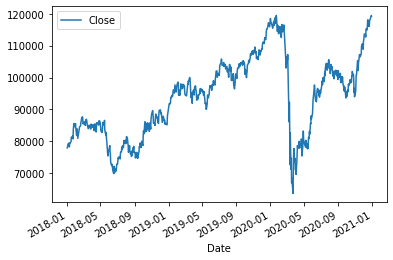

In [11]:
df[['Close']].plot()

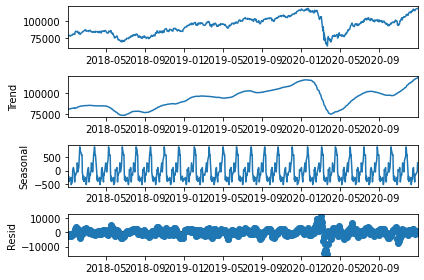

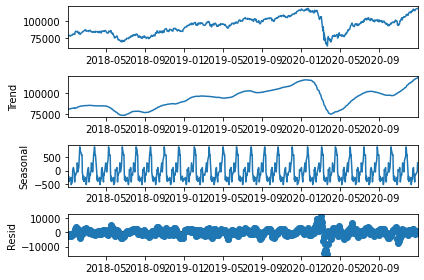

In [12]:
decomp.plot()

In [16]:
decomp_multi = seasonal_decompose(array_like_object , model = "multiplicative" , period= 30 , extrapolate_trend = 30)

In [17]:
decomp_multi.seasonal

Date
2018-01-02 00:00:00-02:00    0.999506
2018-01-03 00:00:00-02:00    0.995696
2018-01-04 00:00:00-02:00    0.997951
2018-01-05 00:00:00-02:00    0.995404
2018-01-08 00:00:00-02:00    0.996471
                               ...   
2020-12-22 00:00:00-03:00    0.999131
2020-12-23 00:00:00-03:00    0.998075
2020-12-28 00:00:00-03:00    0.999495
2020-12-29 00:00:00-03:00    1.000454
2020-12-30 00:00:00-03:00    1.004161
Name: seasonal, Length: 741, dtype: float64

# Reading Instabul stock exchange

#### source:https://www.kaggle.com/code/stpeteishii/istanbul-stock-prediction-lstm

In [13]:
#create an object with content of our github datasets Repository
url = "https://raw.githubusercontent.com/data-science-ci/actions-price-analysis/main/datasets/istanbul_stock_exchange.csv?token=GHSAT0AAAAAAB2MPMSVO7LUJAI2MNF4S6IKY25GPTA"
#rl_content = requests.get(url).content

In [14]:
#reading csv data
df = pd.read_csv(url)
df

HTTPError: ignored